In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import os.path
import os,re
import glob
import pprint
import pathlib
import threading
import time
import joblib
from pandas import DataFrame
from datetime import datetime,timedelta
import datetime
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from tensorflow import keras
import random
from sklearn.utils import shuffle

In [19]:
def my_seed_everywhere(seed: int = 33):
    random.seed(seed) # random
    np.random.seed(seed) # np
    os.environ["PYTHONHASHSEED"] = str(seed) # os
    tf.random.set_seed(seed) # tensorflow

my_seed = 33
my_seed_everywhere(my_seed)

### Extracting Images

In [3]:
file_destination =  r'C:\Users\SM-PC\BDJ\BDJ_S.P.MCPL_CNN\BDJ_Spectrogram_deep\sp1'
import cv2

image_w = 32
image_h = 32

X = []
Y = []
for f in glob.glob(file_destination + "/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (image_w, image_h))
    X.append(img)

In [4]:
ls = []
for f in os.listdir(file_destination):
#      print((f.split('_')[0:2][0])+'_'+(f.split('_')[0:2][1]))
#     print(f.split('_')[0])
     labels = (f.split('_')[0:2][0])+'_'+(f.split('_')[0:2][1])
     ls.append(labels)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(ls)
label = encoder.transform(ls)
# print the decoded labels
encoder.inverse_transform(label)

array(['axis_11', 'axis_11', 'axis_11', ..., 'rotating_5d5',
       'rotating_5d5', 'rotating_5d5'], dtype='<U12')

In [6]:
from keras.utils import np_utils
label_cat = np_utils.to_categorical(label)

In [7]:
X = np.array(X)
Y = np.array(label_cat)
# print(X,Y)

In [48]:
X.shape

(42992, 32, 32, 3)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    shuffle=True,
                                                    stratify=Y,test_size=0.3,
                                                    random_state = 333)
xy = (X_train, X_test, y_train, y_test)

X_train = X_train.astype("float") / 255.0
X_test  = X_test.astype("float")  / 255.0
print('X_train shape:', X_train.shape)

X_train shape: (30094, 32, 32, 3)


### CNN Model3

In [9]:
from keras.models import Sequential,Model
from keras.layers import MaxPooling2D,MaxPooling3D,UpSampling2D,Input,Conv2DTranspose
from keras.layers import Conv2D,Conv3D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Dropout

In [10]:
def hist(hist):
    
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    
    acc_ax.set_ylim(0.6,0.83)
    
    loss_ax.legend(bbox_to_anchor=(-0.1,0.15))
    acc_ax.legend(bbox_to_anchor=(1.35,1))

    plt.show()

In [20]:
# Define the input shape
input_shape = (32, 32, 3)  # Assuming the input image size is 28x28 with 1 channel

# Define the CNN architecture
model2 = tf.keras.Sequential([
    # Image Block
    Conv2D(filters=50, kernel_size=5, activation='relu', padding='same', input_shape=input_shape),
    Conv2D(filters=50, kernel_size=5, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
    Conv2D(filters=100, kernel_size=5, activation='relu', padding='same'),
    Conv2D(filters=100, kernel_size=5, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),

    # Classification Head
    Flatten(),
    Dense(units=43, activation='softmax')
])

# Compile the model with the given optimizer and learning rate
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 50)        3800      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 50)        62550     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 50)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 100)       125100    
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 100)       250100    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 100)        0         
 2D)                                                  

In [21]:
history2 = model2.fit(X_train,y_train,validation_data=(X_test,y_test),
       batch_size = 16,epochs=100)

Epoch 1/100
1881/1881 [==============================] - 11s 6ms/step - loss: 0.4648 - accuracy: 0.7777 - val_loss: 0.3071 - val_accuracy: 0.8018
Epoch 2/100
1881/1881 [==============================] - 10s 6ms/step - loss: 0.2830 - accuracy: 0.8118 - val_loss: 0.2699 - val_accuracy: 0.8114
Epoch 3/100
1881/1881 [==============================] - 10s 6ms/step - loss: 0.2772 - accuracy: 0.8070 - val_loss: 0.2688 - val_accuracy: 0.8086
Epoch 4/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2733 - accuracy: 0.8098 - val_loss: 0.2646 - val_accuracy: 0.8097
Epoch 5/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2704 - accuracy: 0.8116 - val_loss: 0.2696 - val_accuracy: 0.8103
Epoch 6/100
1881/1881 [==============================] - 10s 6ms/step - loss: 0.2696 - accuracy: 0.8113 - val_loss: 0.2747 - val_accuracy: 0.8104
Epoch 7/100
1881/1881 [==============================] - 11s 6ms/step - loss: 0.2688 - accuracy: 0.8109 - val_loss: 0.2657 -

Epoch 57/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2630 - accuracy: 0.8155 - val_loss: 0.2694 - val_accuracy: 0.8069
Epoch 58/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2617 - accuracy: 0.8133 - val_loss: 0.2738 - val_accuracy: 0.8043
Epoch 59/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2642 - accuracy: 0.8132 - val_loss: 0.2647 - val_accuracy: 0.8054
Epoch 60/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2645 - accuracy: 0.8144 - val_loss: 0.2684 - val_accuracy: 0.8125
Epoch 61/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2629 - accuracy: 0.8130 - val_loss: 0.2665 - val_accuracy: 0.8050
Epoch 62/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2608 - accuracy: 0.8160 - val_loss: 0.2688 - val_accuracy: 0.8071
Epoch 63/100
1881/1881 [==============================] - 10s 5ms/step - loss: 0.2654 - accuracy: 0.8147 - val_loss: 0

In [22]:
model2.evaluate(X_train,y_train)

941/941 [==============================] - 2s 2ms/step - loss: 0.2671 - accuracy: 0.8125


[0.2671498656272888, 0.8125207424163818]

In [23]:
model2.evaluate(X_test,y_test)

404/404 [==============================] - 1s 2ms/step - loss: 0.2764 - accuracy: 0.8081


[0.2764011323451996, 0.8081097602844238]

In [26]:
model2.save('BDJ_CNN_Models/history2.h5')

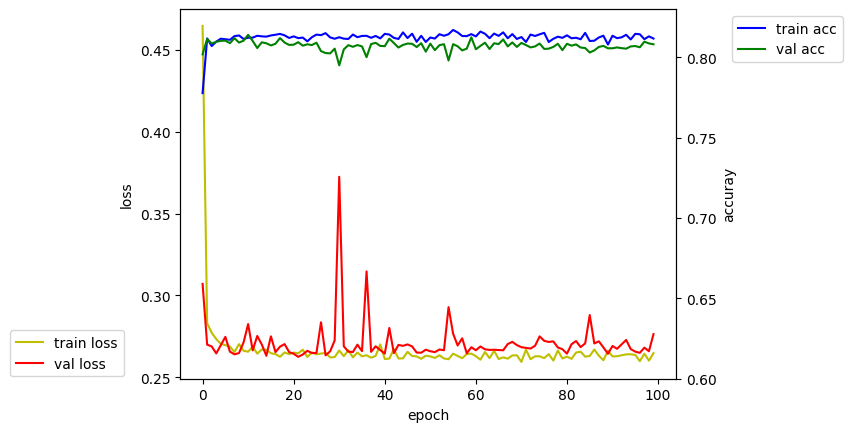

In [24]:
hist(history2)

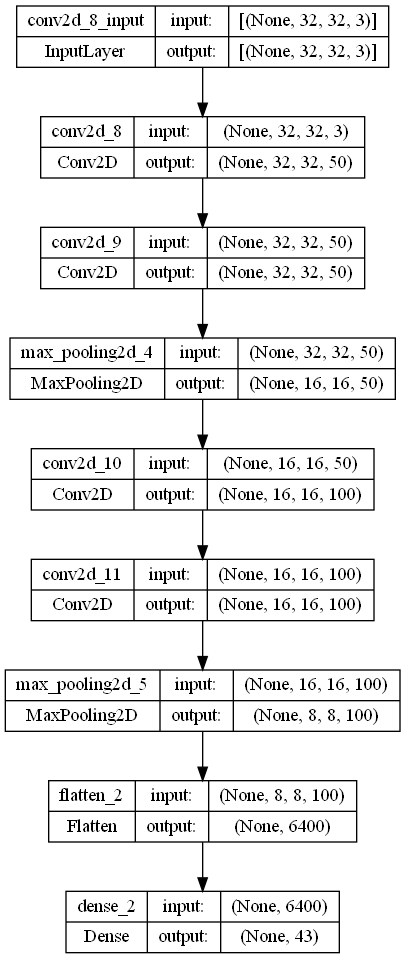

In [27]:
from keras.utils import plot_model
from tensorflow.keras.utils import plot_model

plot_model(model2, to_file="BDJ_CNN_ModelArchitecture/model2.png", show_shapes=True)

### Confusion Matrix

In [28]:
from keras.models import load_model
model2_load = keras.models.load_model("BDJ_CNN_Models/history2.h5")

In [29]:
pred2 = model2_load.predict(X_test)

404/404 [==============================] - 1s 2ms/step


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_pred2=np.argmax(pred2, axis=1)
y_test_pred2=np.argmax(y_test, axis=1)

In [32]:
y_test_pred2

array([ 9, 33, 29, ...,  4, 33, 34], dtype=int64)

In [33]:
cm = confusion_matrix(y_test_pred2,y_pred2)

In [34]:
cm

array([[  5,   0,   0, ...,   0,   0,   0],
       [  0,   4,   0, ...,   0,   0,   0],
       [  0,   0, 107, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 300,   0,   0],
       [  0,   0,   0, ...,   0, 271,   0],
       [  0,   0,   0, ...,   0,   0, 300]], dtype=int64)

In [35]:
cm_df = DataFrame(cm)

In [36]:
cm_df 

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,285,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,283,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,300,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,300,...,0,0,0,0,0,0,0,0,0,0


In [37]:
cm_label = DataFrame(encoder.inverse_transform(label))[0].unique()

In [38]:
cm_label

array(['axis_11', 'axis_22', 'axis_2d2', 'axis_30', 'axis_37',
       'axis_3d75', 'axis_3d7', 'axis_5d5', 'axis_7d5', 'bearing_11',
       'bearing_15', 'bearing_18d5', 'bearing_2d2', 'bearing_3d7',
       'bearing_5d5', 'bearing_7d5', 'belt_11', 'belt_15', 'belt_18d5',
       'belt_22', 'belt_2d2', 'belt_55', 'belt_5d5', 'belt_7d5',
       'normal_11', 'normal_15', 'normal_18d5', 'normal_22', 'normal_2d2',
       'normal_30', 'normal_37', 'normal_3d75', 'normal_3d7', 'normal_55',
       'normal_5d5', 'normal_7d5', 'rotating_11', 'rotating_15',
       'rotating_22', 'rotating_2d2', 'rotating_3d7', 'rotating_55',
       'rotating_5d5'], dtype=object)

In [39]:
cm_df.columns=cm_label

In [40]:
cm_df.index = cm_label

In [41]:
cm_df.to_csv(r'C:\Users\SM-PC\BDJ\BDJ_S.P.MCPL_CNN\BDJ_ConfusionMatrix\history2_cm.csv')

In [42]:
cm_df

,axis_11,axis_22,axis_2d2,axis_30,axis_37,axis_3d75,axis_3d7,axis_5d5,axis_7d5,bearing_11,...,normal_55,normal_5d5,normal_7d5,rotating_11,rotating_15,rotating_22,rotating_2d2,rotating_3d7,rotating_55,rotating_5d5
axis_11,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_22,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_2d2,0,0,107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_30,0,0,0,285,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_37,0,0,0,0,300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_3d75,0,0,0,0,0,283,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_3d7,0,0,0,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_5d5,0,0,0,0,0,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
axis_7d5,0,0,0,0,0,0,0,0,300,0,...,0,0,0,0,0,0,0,0,0,0
bearing_11,0,0,0,0,0,0,0,0,0,300,...,0,0,0,0,0,0,0,0,0,0


In [43]:
import seaborn as sns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5]),
 [Text(0, 0.5, 'axis_11'),
  Text(0, 1.5, 'axis_22'),
  Text(0, 2.5, 'axis_2d2'),
  Text(0, 3.5, 'axis_30'),
  Text(0, 4.5, 'axis_37'),
  Text(0, 5.5, 'axis_3d75'),
  Text(0, 6.5, 'axis_3d7'),
  Text(0, 7.5, 'axis_5d5'),
  Text(0, 8.5, 'axis_7d5'),
  Text(0, 9.5, 'bearing_11'),
  Text(0, 10.5, 'bearing_15'),
  Text(0, 11.5, 'bearing_18d5'),
  Text(0, 12.5, 'bearing_2d2'),
  Text(0, 13.5, 'bearing_3d7'),
  Text(0, 14.5, 'bearing_5d5'),
  Text(0, 15.5, 'bearing_7d5'),
  Text(0, 16.5, 'belt_11'),
  Text(0, 17.5, 'belt_15'),
  Text(0, 18.5, 'belt_18d5'),
  Text(0, 19.5, 'belt_22'),
  Text(0, 20.5, 'belt_2d2'),
  Text(0, 21.5, 'belt_55'),
  Text(0, 22.5, 'belt_5d5'),
  Text(0, 23.5, 'belt_7d5'),
  Text(0

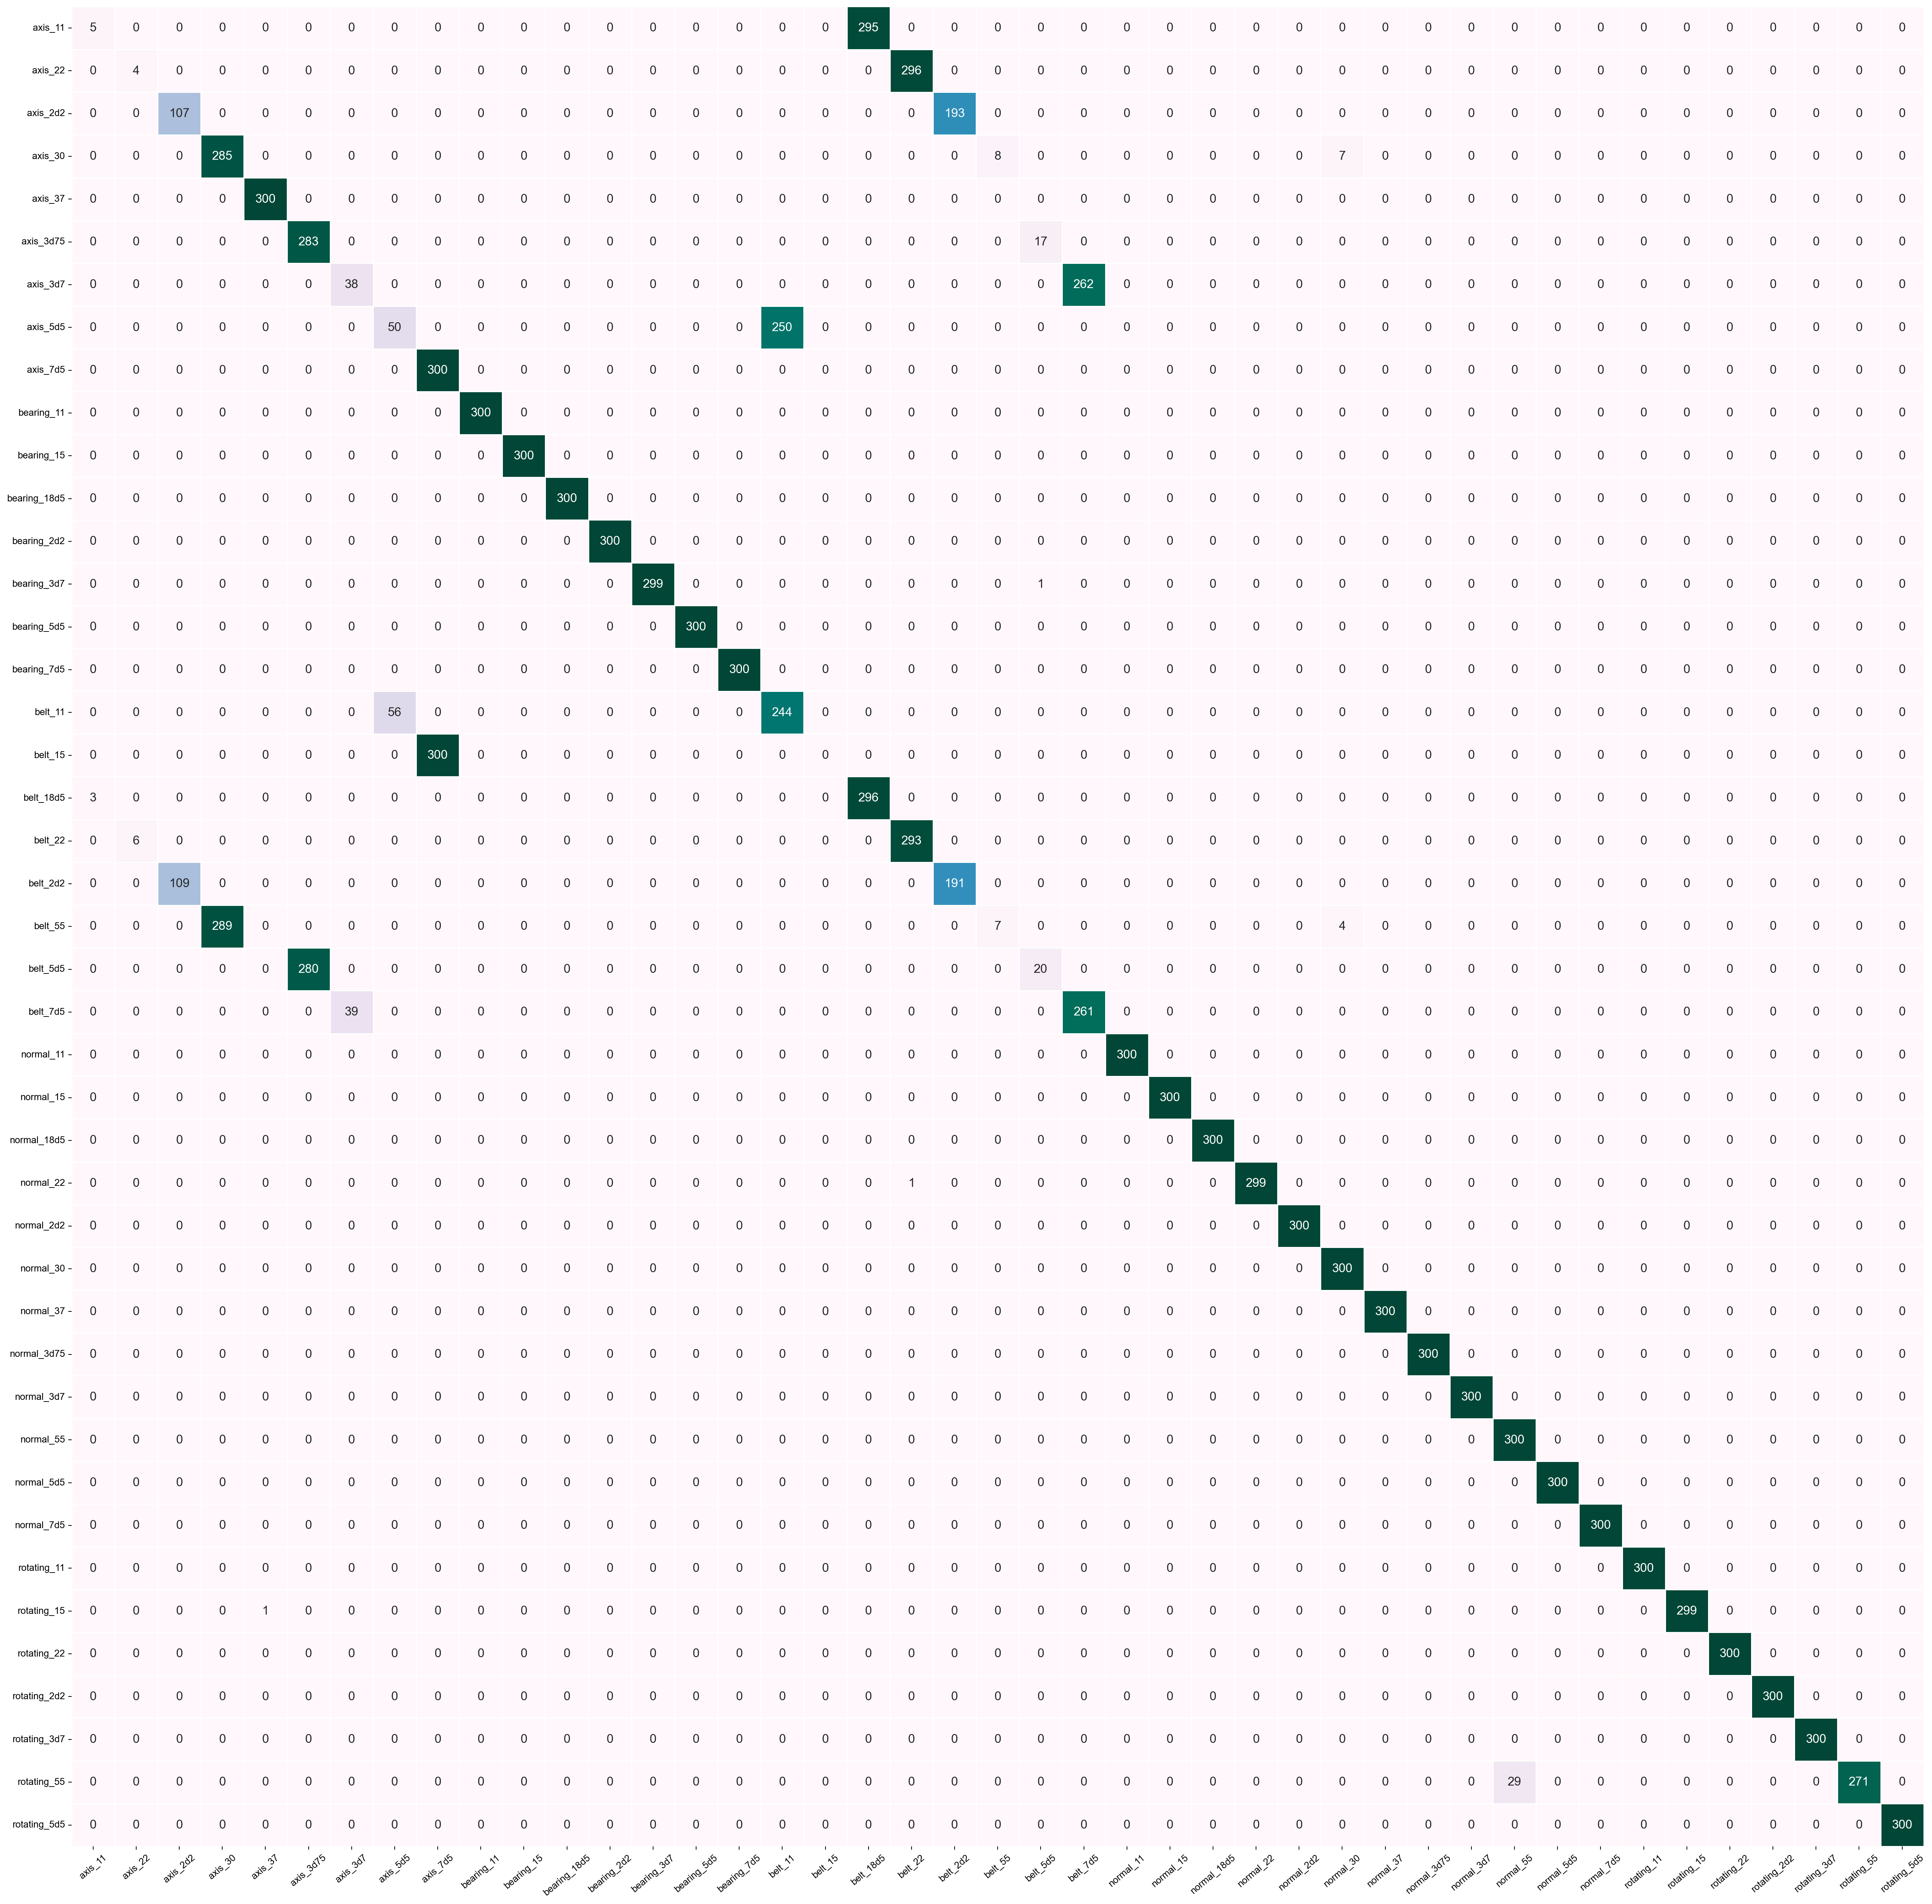

In [44]:
plt.rcParams['axes.unicode_minus'] = False
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina'")
plt.figure(figsize=(35,35))
sns.heatmap(cm_df,annot=True,fmt = '.0f',cmap = "PuBuGn",annot_kws={"size": 13},
           cbar=False,linewidths=1)
sns.set(font_scale=1.8)
plt.xticks(rotation=40)
plt.yticks(rotation=0)

In [46]:
y_pred_arg = np.argmax(pred2,axis=1)
y_test_arg = np.argmax(y_test,axis=1)
cm_label = DataFrame(encoder.inverse_transform(label))[0].unique()

### classification_report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg, target_names=cm_label))

              precision    recall  f1-score   support

     axis_11       0.62      0.02      0.03       300
     axis_22       0.40      0.01      0.03       300
    axis_2d2       0.50      0.36      0.41       300
     axis_30       0.50      0.95      0.65       300
     axis_37       1.00      1.00      1.00       300
   axis_3d75       0.50      0.94      0.66       300
    axis_3d7       0.49      0.13      0.20       300
    axis_5d5       0.47      0.17      0.25       300
    axis_7d5       0.50      1.00      0.67       300
  bearing_11       1.00      1.00      1.00       300
  bearing_15       1.00      1.00      1.00       300
bearing_18d5       1.00      1.00      1.00       300
 bearing_2d2       1.00      1.00      1.00       300
 bearing_3d7       1.00      1.00      1.00       300
 bearing_5d5       1.00      1.00      1.00       300
 bearing_7d5       1.00      1.00      1.00       300
     belt_11       0.49      0.81      0.61       300
     belt_15       0.00    